In [1]:
from segment_anything import SamAutomaticMaskGenerator, sam_model_registry, SamPredictor
import cv2

checkpoint= '/mnt/segment-anything-eo/sam_vit_h_4b8939.pth' #"/mnt/segment-anything-eo/sam_vit_h_4b8939.pth",
sam = sam_model_registry['vit_h'](checkpoint=checkpoint)
device = 'cuda:0'
sam.to(device)
mask_generator = SamAutomaticMaskGenerator(sam)

img = cv2.cvtColor(cv2.imread('/mnt/Mussel/Mussel.png'), cv2.COLOR_BGR2RGB)
masks = mask_generator.generate(img)

In [2]:
#Need input points to make this work

# from segment_anything import SamPredictor
# predictor = SamPredictor(sam)

# predictor.set_image(img)
# masks, _, _ = predictor.predict( 'Mussel', point_coords = None)

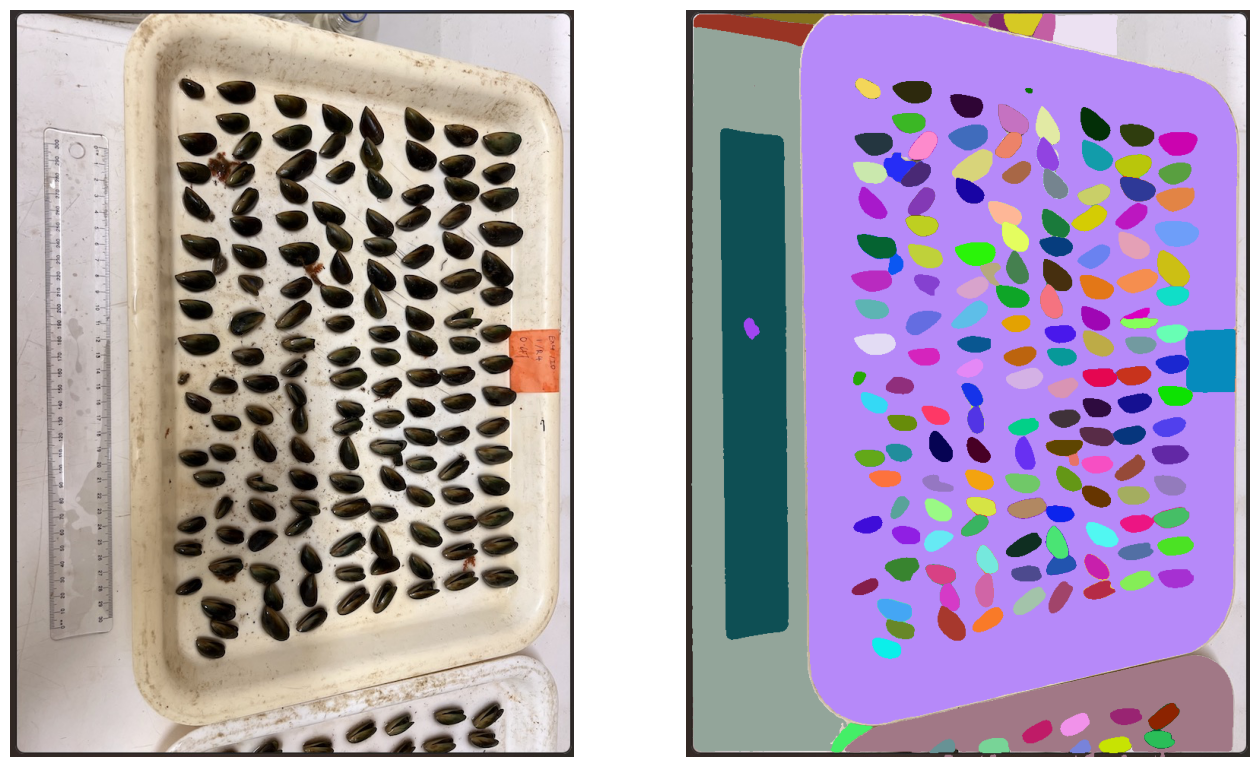

In [3]:
import random
import matplotlib.pyplot as plt
import numpy as np

def show_anns(anns, axes=None):
    if len(anns) == 0:
        return
    if axes:
        ax = axes
    else:
        ax = plt.gca()
        ax.set_autoscale_on(False)
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    polygons = []
    color = []
    for ann in sorted_anns:
        m = ann['segmentation']
        img = np.ones((m.shape[0], m.shape[1], 3))
        color_mask = np.random.random((1, 3)).tolist()[0]
        for i in range(3):
            img[:,:,i] = color_mask[i]
        ax.imshow(np.dstack((img, m**0.5)))

# Plot the original image and the mask
fig, axs = plt.subplots(1, 2, figsize=(16, 16))
axs[0].imshow(img)
axs[1].imshow(img)
show_anns(masks, axs[1])
axs[0].axis('off')
axs[1].axis('off')
plt.savefig('/mnt/Mussel/Mussel_segments.png')
plt.show()
# for idx in random_indices:
#     # Get the image tensor
#     image_tensor= train_dataset[idx]

#     # Apply the mask generator
#     masks = mask_generator1.generate(image_tensor)

#     # Convert the image tensor back to a PIL image
#     image = torchvision.transforms.ToPILImage()(image_tensor)
    
#     # Plot the original image and the mask
#     fig, axs = plt.subplots(1, 2, figsize=(12, 4))
#     axs[0].imshow(image)
#     axs[1].imshow(image)
#     show_anns(masks, axs[len(image)][len(image[0])])
#     axs[0].axis('off')
#     axs[1].axis('off')
#     plt.show()

In [6]:
print(masks)

[{'segmentation': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), 'area': 55264, 'bbox': [45, 157, 89, 672], 'predicted_iou': 1.012357473373413, 'point_coords': [[81.15625, 169.125]], 'stability_score': 0.9879800081253052, 'crop_box': [0, 0, 742, 984]}, {'segmentation': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), 'area': 5215, 'bbox': [657, 421, 65, 83], 'predicted_iou': 1.0065850019454956

In [4]:
from shapely.geometry import Polygon

for mask in masks:
    print(mask)
    contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    print(contours)
    polygons = []

    for obj in contours:
        coords = []
            
        for point in obj:
            coords.append(int(point[0][0]))
            coords.append(int(point[0][1]))

        polygons.append(coords)
    print(polygons)

{'segmentation': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), 'area': 55264, 'bbox': [45, 157, 89, 672], 'predicted_iou': 1.012357473373413, 'point_coords': [[81.15625, 169.125]], 'stability_score': 0.9879800081253052, 'crop_box': [0, 0, 742, 984]}


error: OpenCV(4.7.0) :-1: error: (-5:Bad argument) in function 'findContours'
> Overload resolution failed:
>  - image is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'image'
